<a href="https://colab.research.google.com/github/dylanwalker/MGSC496/blob/main/MGSC496_L08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the in-class notebook for MGSC496 Lecture 8.

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example: Predicting Which Chapman Students Like Basketball 

In [ ]:
basketball_df = pd.read_csv('https://raw.githubusercontent.com/dylanwalker/MGSC496/main/datasets/basketball.csv')
basketball_df = pd.get_dummies(basketball_df, drop_first=True)
basketball_df.columns = ['height','athletic_shoes','has_hat','basketball']
basketball_df.head()

,height,athletic_shoes,has_hat,basketball
0,70,1,0,1
1,68,1,1,1
2,73,1,0,0
3,64,1,0,0
4,67,1,0,1


In [ ]:
Xb = basketball_df.loc[:,'height':'has_hat']
yb = basketball_df.loc[:,'basketball']

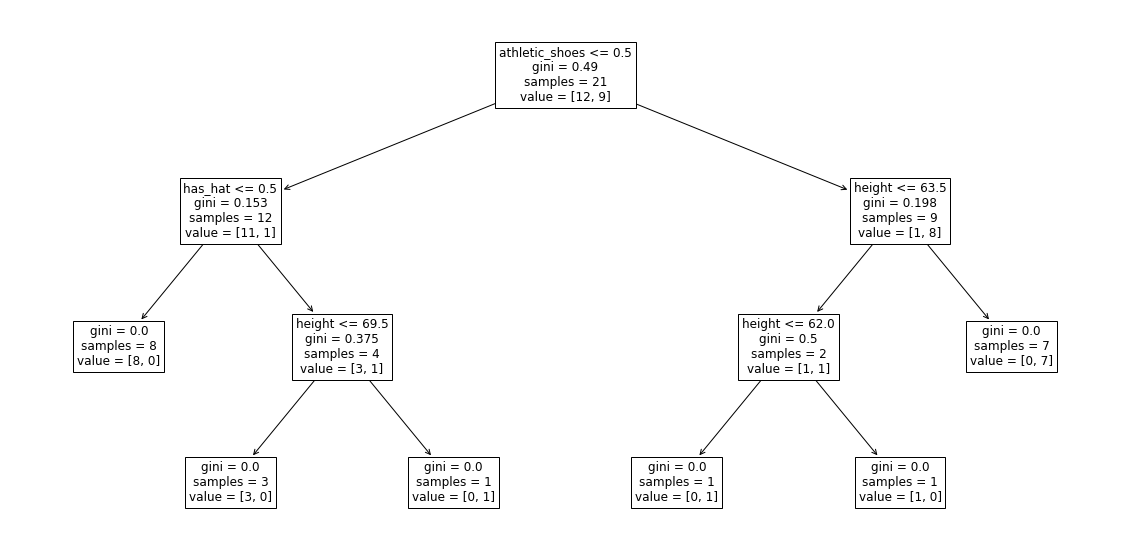

0.7777777777777778

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=3)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.30)
decision_tree.fit(Xb_train, yb_train)
plt.figure(figsize=(20,10))
sklearn.tree.plot_tree(decision_tree, feature_names=Xb.columns, fontsize=12);
plt.show()
decision_tree.score(Xb_test,yb_test)

# Example: Decision Tree and Naive Bayes on Loan Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
# Preprocess data (make non-numerical columns numerical)
loan_df.dropna(inplace=True)
Xloan = pd.get_dummies(loan_df.loc[:,'Gender':'Property_Area'], drop_first=True)
yloan = (loan_df.Loan_Status=='Y')*1.0
Xloan.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,0,1,0,1


In [ ]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xloan, yloan, test_size=0.25, random_state=0)

## Decision Tree on Loan Data

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(Xl_train, yl_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
decision_tree.score(Xl_test, yl_test)

0.7833333333333333

In [ ]:
yl_pred = decision_tree.predict(Xl_test)

In [ ]:
accuracy_score(yl_test, yl_pred)

0.7833333333333333

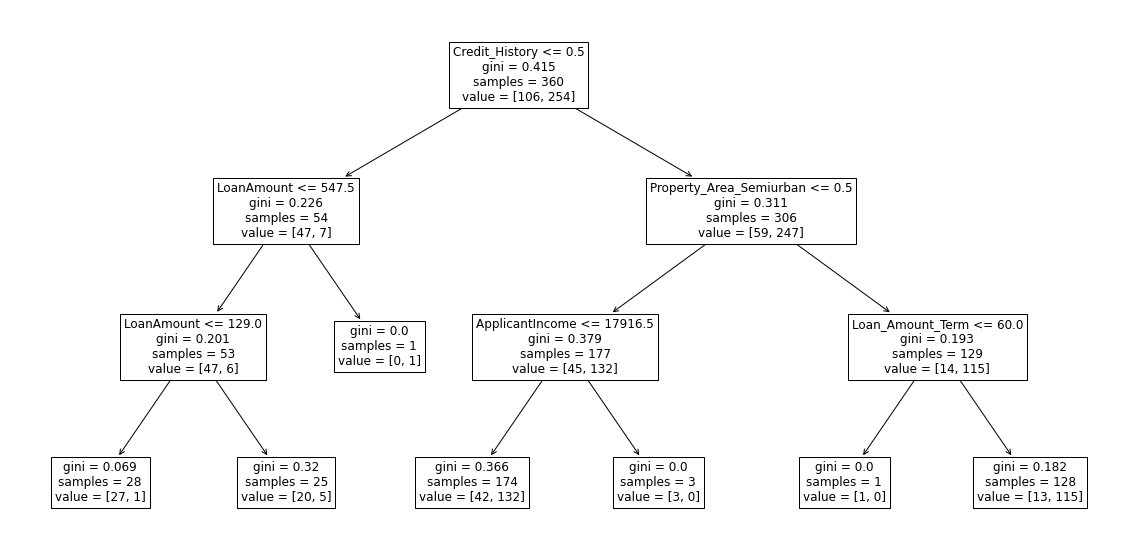

In [ ]:
plt.figure(figsize=(20,10))
sklearn.tree.plot_tree(decision_tree, feature_names=Xloan.columns, fontsize=12);
plt.show()

What about a random forest?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(Xl_train, yl_train)

RandomForestClassifier(random_state=0)

In [ ]:
rf.score(Xl_test, yl_test)

0.775

## Naive Bayes on Loan Data

What about Naive Bayes?

In [ ]:
1. Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Xl_train, yl_train)

GaussianNB()

In [ ]:
nb.score(Xl_test, yl_test)

0.7666666666666667

## Categorical Naive Bayes

If we want to do Categorical Naive Bayes, we will have to convert our original loan data to be purely categorical. We can use pandas to cut numerical data into bins that we specify using `pd.cut()` or into bins based on quantiles using `pd.qcut()`. Its usually a good idea to look at how each variable is distributed before making decisions about bins for categorizing the data. We can do this with `.describe()` and `.value_counts()`.

In [ ]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
loan_df.Loan_Amount_Term.value_counts()


360.0    411
180.0     36
480.0     12
300.0      9
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: Loan_Amount_Term, dtype: int64

In [ ]:
pd.cut(loan_df.Loan_Amount_Term, bins=[0,60,180,360,480], labels=['vshort','short','medium','long'])

1      medium
2      medium
3      medium
4      medium
5      medium
        ...  
609    medium
610     short
611    medium
612    medium
613    medium
Name: Loan_Amount_Term, Length: 480, dtype: category
Categories (4, object): ['vshort' < 'short' < 'medium' < 'long']

In [ ]:
loan_df = pd.read_csv('https://raw.githubusercontent.com/dylanwalker/MGSC496/main/datasets/loan_data_set.csv')
loan_df.dropna(inplace=True)
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


Here's the decisions that I made to add categorical columns to the dataframe. Ultimately, we will want to keep just the categorical columns and drop the numerical ones, because Categorical Naive Bayes only works with purely categorical variables:

In [ ]:
loan_df.Credit_History.value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [ ]:
loan_df['CoapplicantIncomeCat'] = 'zero'
loan_df.loc[loan_df.CoapplicantIncome>0,'CoapplicantIncomeCat'] = pd.qcut(loan_df.CoapplicantIncome[loan_df.CoapplicantIncome>0], q=[0,0.25,0.75,1.0], labels = ['low','medium','high'])
loan_df['LoanAmountCat'] = pd.qcut(loan_df.LoanAmount, q=[0,0.25,0.75,1.0], labels = ['low','medium','high'])
loan_df['LoanTermCat'] = pd.cut(loan_df.Loan_Amount_Term, bins=[0,60,180,360,480], labels=['vshort','short','medium','long'])
#loan_df.drop(columns=['ApplicantIncome','CoapplicantIncome',])
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncomeCat,LoanAmountCat,LoanTermCat
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,low,medium,medium
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,zero,low,medium
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,medium,medium,medium
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,zero,medium,medium
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,high,high,medium


Now we can drop the non-categorical variables and use `pd.get_dummies()` to convert the categories to dummy variables:

In [ ]:
Xlc = pd.get_dummies(loan_df.drop(columns=['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status']), drop_first=True)
ylc = (loan_df.Loan_Status=='Y')*1.0

In [ ]:
Xlc_train, Xlc_test, ylc_train, ylc_test = train_test_split(Xlc, ylc, test_size=0.25, random_state=0)

In [ ]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()
cnb.fit(Xlc_train, ylc_train)



CategoricalNB()

In [ ]:
Xlc_train.head()

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,CoapplicantIncomeCat_low,CoapplicantIncomeCat_medium,CoapplicantIncomeCat_zero,LoanAmountCat_medium,LoanAmountCat_high,LoanTermCat_short,LoanTermCat_medium,LoanTermCat_long
566,1.0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
557,1.0,1,1,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0
510,1.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
205,1.0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0
203,1.0,1,1,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0


In [ ]:
cnb.score(Xlc_test, ylc_test)

0.7666666666666667

<hr/>

# K-Fold Cross Validation

Let's look at an example for doing cross-validation in sklearn:

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.model_selection import cross_val_score
loan_df = pd.read_csv('https://raw.githubusercontent.com/dylanwalker/MGSC496/main/datasets/loan_data_set.csv')
loan_df.dropna(inplace=True)
Xloan = pd.get_dummies(loan_df.loc[:,'Gender':'Property_Area'], drop_first=True)
yloan = (loan_df.Loan_Status=='Y')*1.0

#Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xloan, yloan, test_size=0.25, random_state=0)
decision_tree = DecisionTreeClassifier(max_depth=3)
#decision_tree.fit(Xl_train, yl_train)
scores = cross_val_score(decision_tree, Xloan, yloan, cv=5)
print(f'{np.mean(scores)}, {np.std(scores)}')

0.7958333333333334, 0.03703414340548164
